In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

C:\Users\bhara\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Major steps invloved in EDA
* Check for Duplicates
* Handle missing values
* Handle outliers
* Descriptive Statistics
* Data Visualization
* Feature Scaling: Standardization & Normalization; transformations
* Binning & Encoding


In [2]:
df=pd.read_csv("C:\data\churn_dataset.csv",skipinitialspace=True)

In [3]:
df.shape

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [7]:
[features for features in df.columns if df[features].isna().sum()]

['TotalCharges']

In [8]:
x=df.TotalCharges.mean()
df.TotalCharges.mode()

0    20.2
Name: TotalCharges, dtype: float64

In [9]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df[df.TotalCharges.isna()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [11]:
df.TotalCharges.replace(np.nan,x,inplace=True)

In [12]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[5 rows x 21 columns]

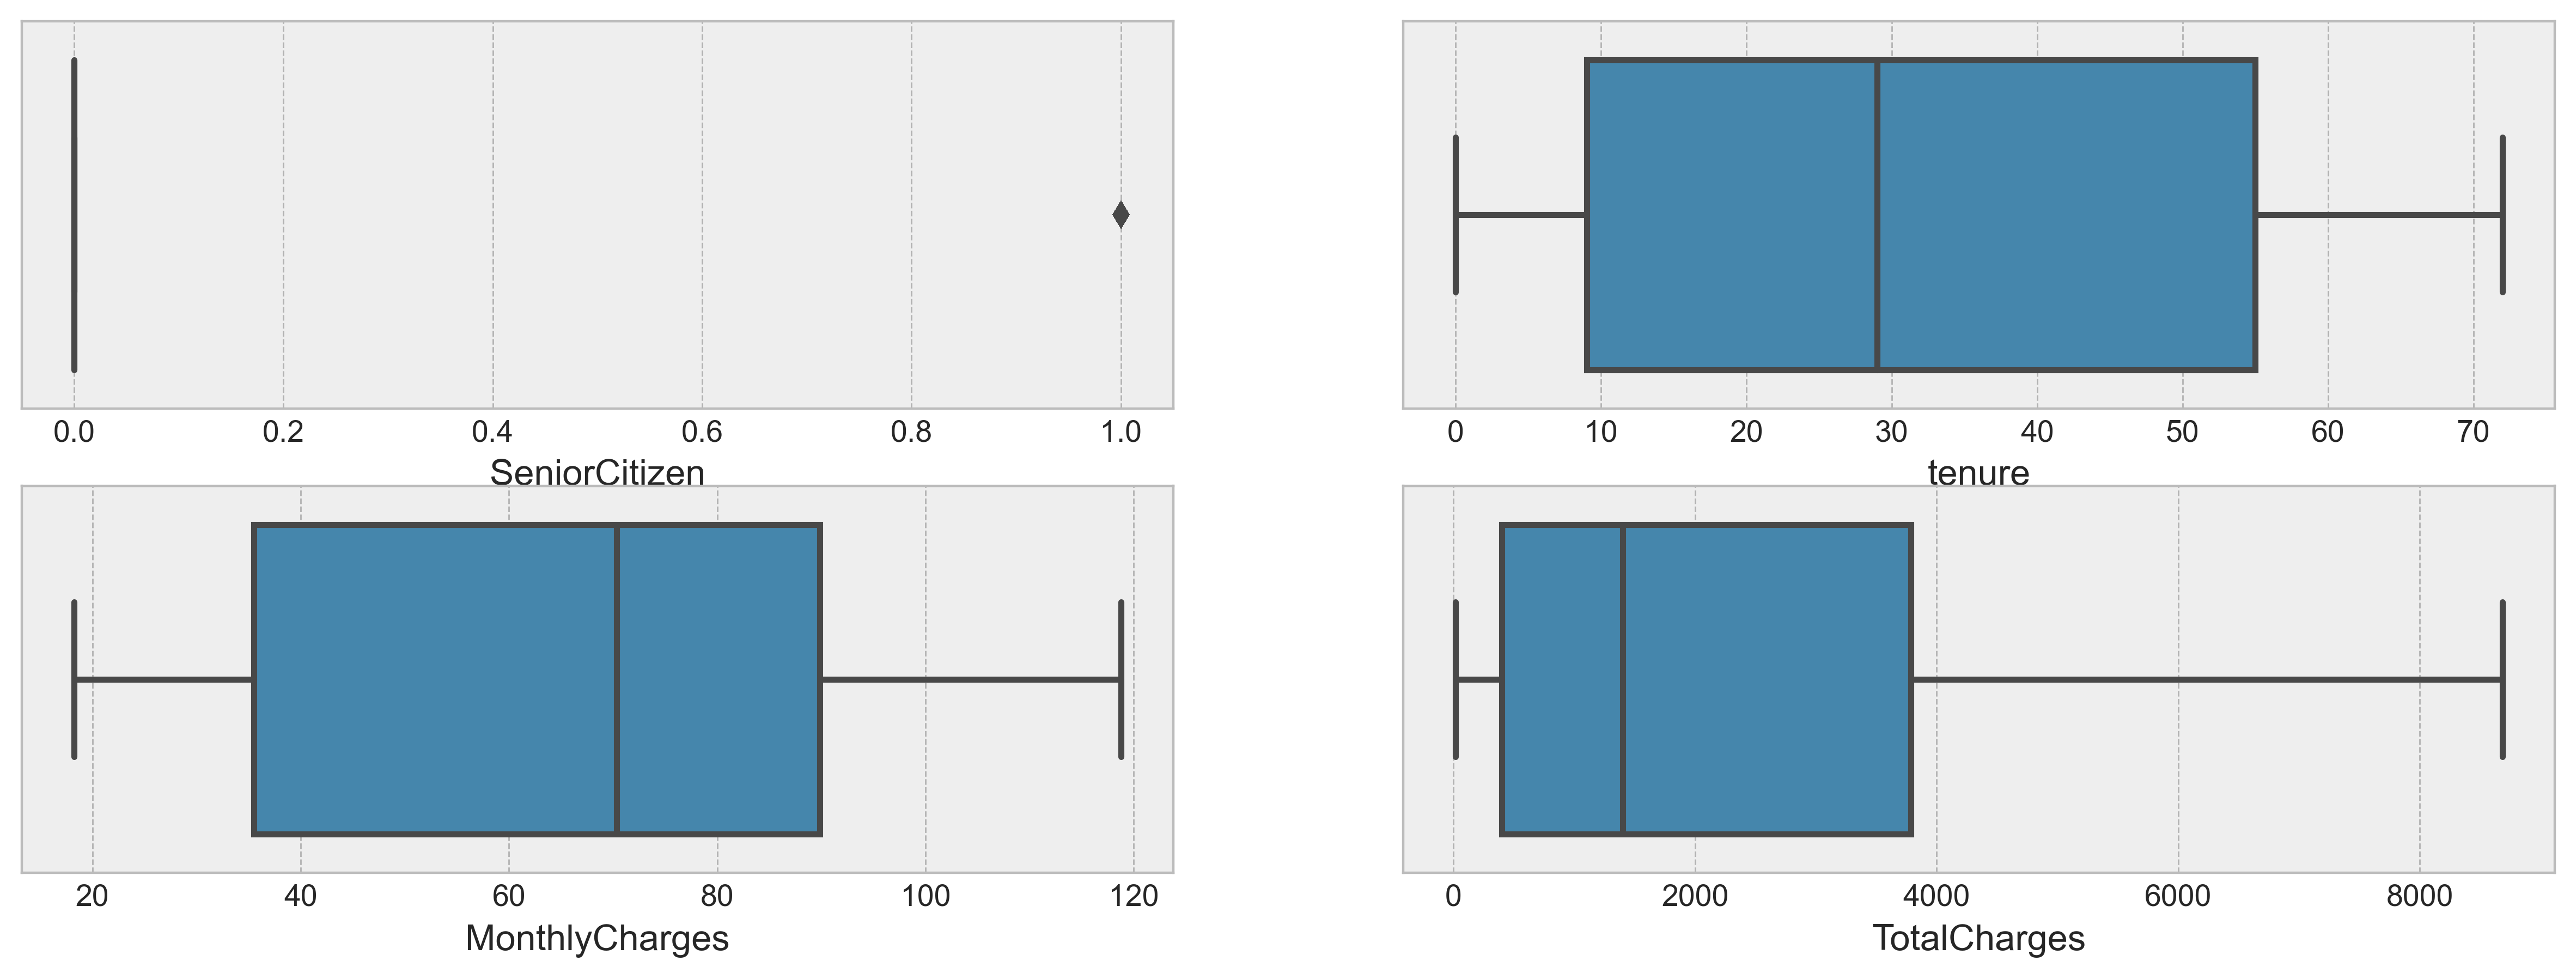

In [15]:
plt.figure(figsize=(15,8),dpi=200)
plt.subplot(321)
sns.boxplot(df.SeniorCitizen)
plt.subplot(322)
sns.boxplot(df.tenure)
plt.subplot(323)
sns.boxplot(df.MonthlyCharges)
plt.subplot(324)
sns.boxplot(df.TotalCharges);


In [16]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

In [17]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [18]:
x=df.groupby(['gender','Partner'])['tenure'].mean()

In [19]:
x.index

MultiIndex([('Female',  'No'),
            ('Female', 'Yes'),
            (  'Male',  'No'),
            (  'Male', 'Yes')],
           names=['gender', 'Partner'])

In [20]:
x.values

array([23.22722222, 41.86018957, 23.48560565, 42.17269545])

# Data Visualization

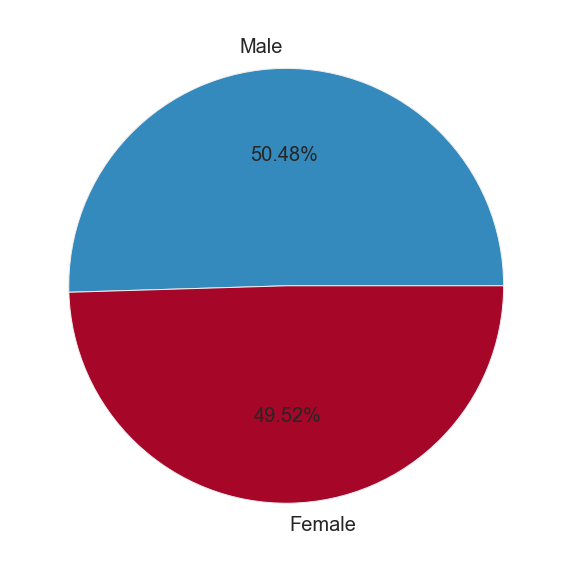

In [21]:
plt.figure(figsize=(5,5))
plt.pie(x = df.gender.value_counts().values,
        labels = df.gender.value_counts().index, autopct = '%.2f%%')
plt.show();

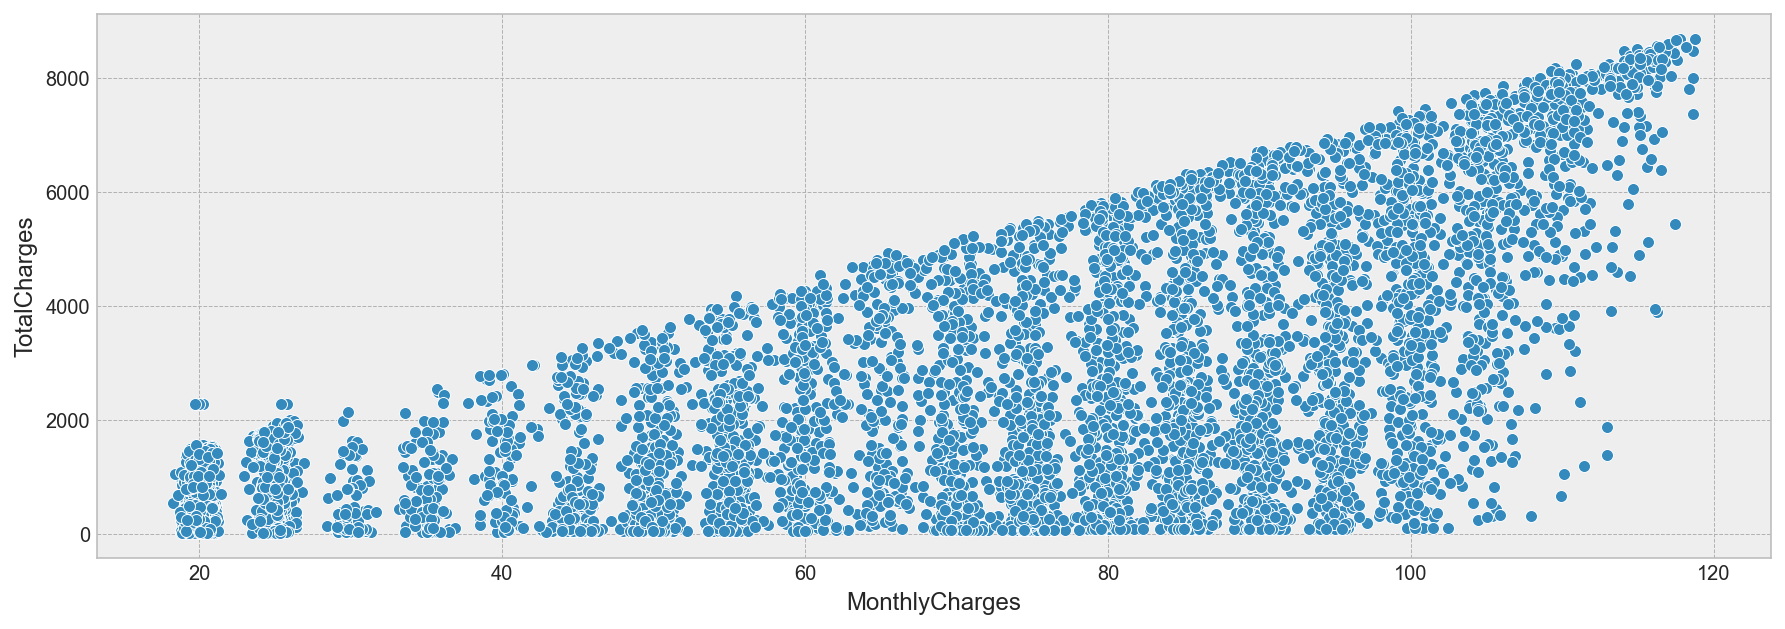

In [22]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = 'MonthlyCharges' , y ='TotalCharges' , data = df);

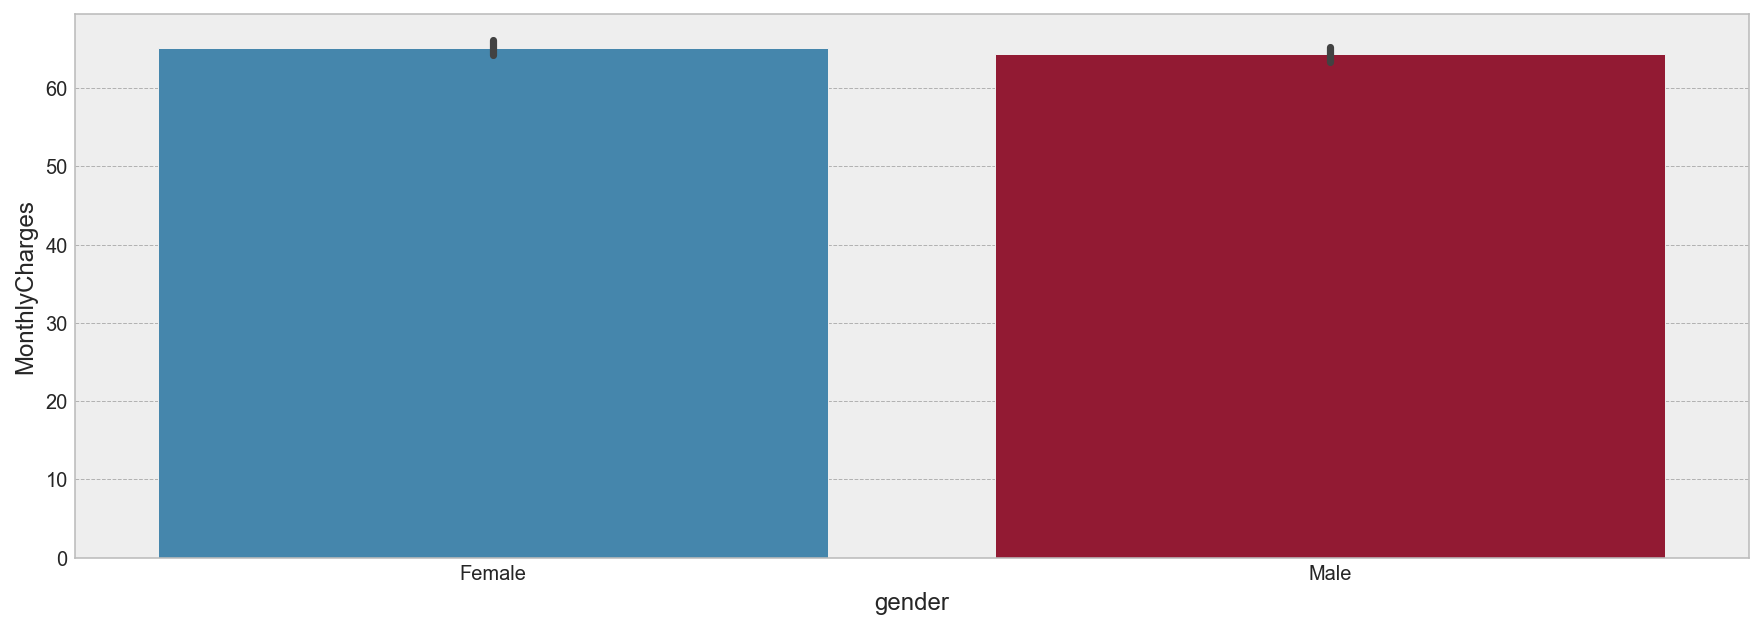

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'gender' , y ='MonthlyCharges' , data = df);

In [24]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

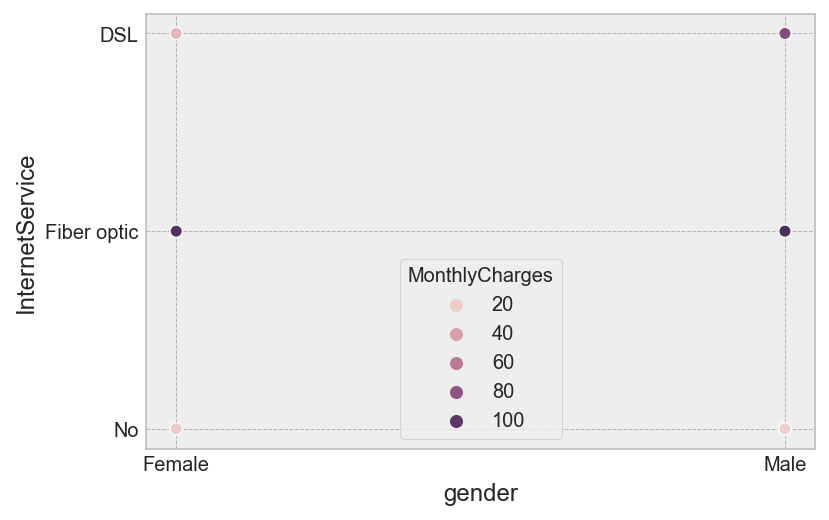

In [25]:
sns.scatterplot(x=df.gender,y=df.InternetService,hue=df.MonthlyCharges);


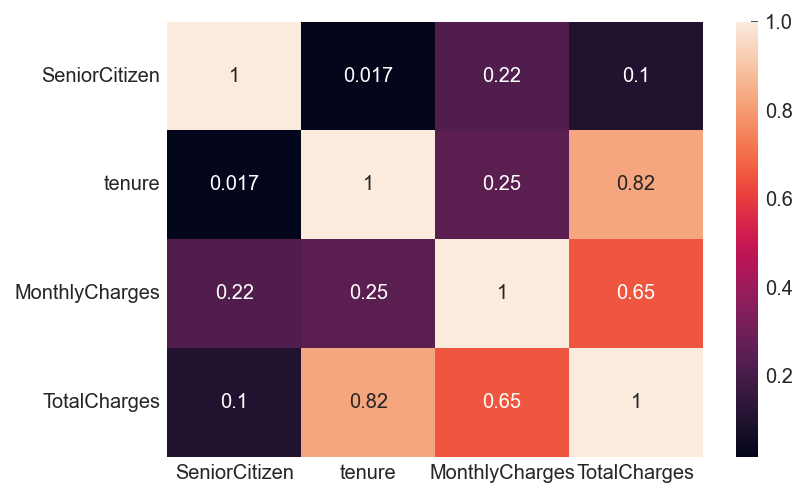

In [26]:
sns.heatmap(df.corr(),annot=True);

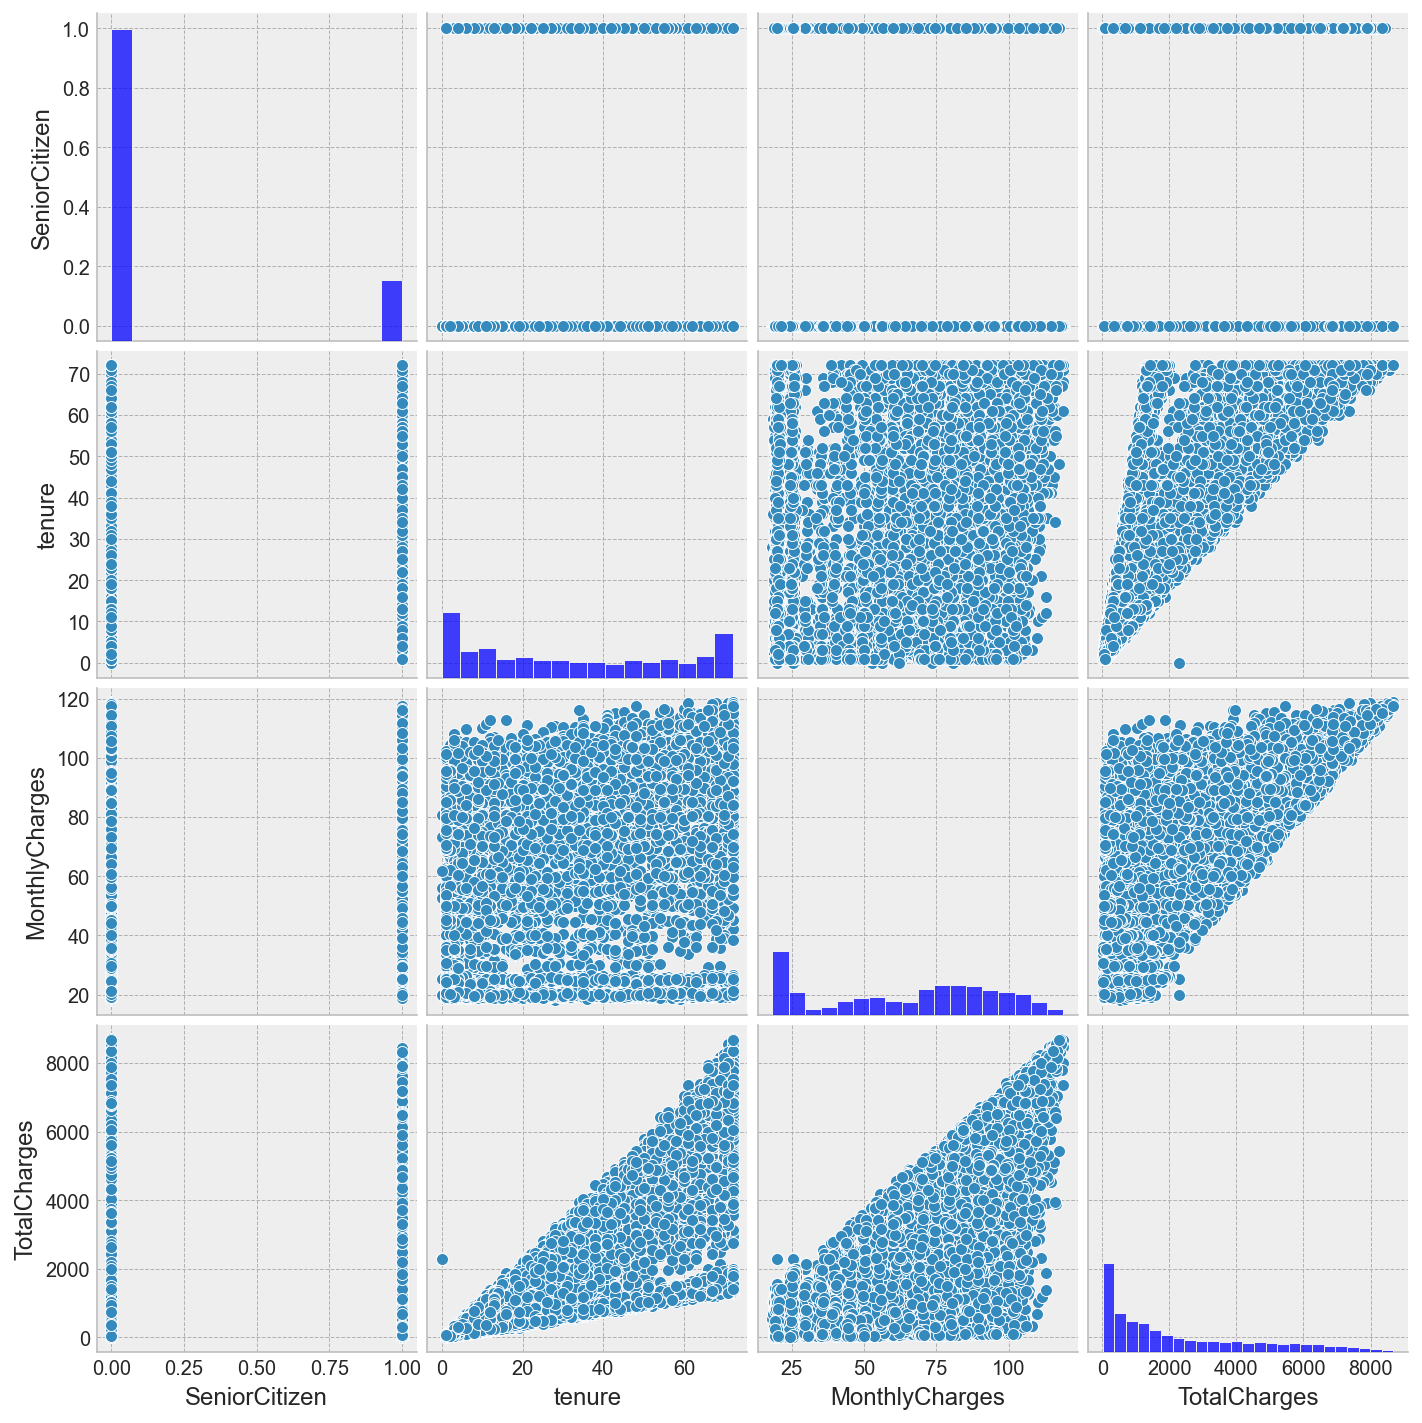

In [27]:
sns.pairplot(df);

In [28]:
df.to_csv("C:\data\churn_cleaned.csv")

# Machine Learning


* Build a system which can take features of Insurance like'customerID','gender','SeniorCitizen','Partner','Dependents','tenure',	'PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV'	,'StreamingMovies'	,'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharge' etc.. and predicts the charges of Medical Insurance.
* Target Variable: > `Churn`

# identifying the output and input variables in dataset

In [29]:
churn_df=pd.read_csv("C:\data\churn_cleaned.csv")

In [30]:
churn_df.head()

Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0           0  7590-VHVEG  Female              0     Yes         No       1   
1           1  5575-GNVDE    Male              0      No         No      34   
2           2  3668-QPYBK    Male              0      No         No       2   
3           3  7795-CFOCW    Male              0      No         No      45   
4           4  9237-HQITU  Female              0      No         No       2   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  
0           Electronic check          29.85        29.85     No  
1               Mailed check          56.95      1889.50     No  
2               Mailed check          53.85       108.15    Yes  
3  Bank transfer (automatic)          42.30      1840.75     No  
4           Electronic check          70.70       151.65    Yes  

[5 rows x 22 columns]

In [31]:
churn_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [32]:
churn_df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [33]:
y = churn_df['Churn']
X = churn_df[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity',
          'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=100)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5282, 18) (5282,)
(1761, 18) (1761,)


In [35]:
X_train.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
6630    Male              1      No         No      16          Yes   
7013  Female              0      No         No      40          Yes   
2224    Male              1     Yes         No      17          Yes   
6580  Female              0     Yes        Yes      49          Yes   
1501    Male              0      No         No      13          Yes   

     MultipleLines InternetService       OnlineSecurity     DeviceProtection  \
6630            No     Fiber optic                   No                   No   
7013           Yes     Fiber optic                   No                  Yes   
2224            No     Fiber optic                   No                   No   
6580            No             DSL                   No                  Yes   
1501            No              No  No internet service  No internet service   

              TechSupport          StreamingTV      StreamingMovies  \
6630                   No                   No                  Yes   
7013                   No                  Yes                   No   
2224                   No                   No                   No   
6580                   No                  Yes                  Yes   
1501  No internet service  No internet service  No internet service   

            Contract PaperlessBilling              PaymentMethod  \
6630  Month-to-month              Yes           Electronic check   
7013  Month-to-month              Yes  Bank transfer (automatic)   
2224  Month-to-month              Yes           Electronic check   
6580        One year               No    Credit card (automatic)   
1501        Two year               No               Mailed check   

      MonthlyCharges  TotalCharges  
6630           78.75       1218.25  
7013           93.40       3756.40  
2224           76.45       1233.40  
6580           78.00       3824.20  
1501           19.95        243.65

### Separating Categorical and Numerical Columns

In [36]:
X_train.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
6630    Male              1      No         No      16          Yes   
7013  Female              0      No         No      40          Yes   
2224    Male              1     Yes         No      17          Yes   
6580  Female              0     Yes        Yes      49          Yes   
1501    Male              0      No         No      13          Yes   

     MultipleLines InternetService       OnlineSecurity     DeviceProtection  \
6630            No     Fiber optic                   No                   No   
7013           Yes     Fiber optic                   No                  Yes   
2224            No     Fiber optic                   No                   No   
6580            No             DSL                   No                  Yes   
1501            No              No  No internet service  No internet service   

              TechSupport          StreamingTV      StreamingMovies  \
6630                   No                   No                  Yes   
7013                   No                  Yes                   No   
2224                   No                   No                   No   
6580                   No                  Yes                  Yes   
1501  No internet service  No internet service  No internet service   

            Contract PaperlessBilling              PaymentMethod  \
6630  Month-to-month              Yes           Electronic check   
7013  Month-to-month              Yes  Bank transfer (automatic)   
2224  Month-to-month              Yes           Electronic check   
6580        One year               No    Credit card (automatic)   
1501        Two year               No               Mailed check   

      MonthlyCharges  TotalCharges  
6630           78.75       1218.25  
7013           93.40       3756.40  
2224           76.45       1233.40  
6580           78.00       3824.20  
1501           19.95        243.65

In [37]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [38]:
X_train_cat=X_train.select_dtypes(include=['object'])

In [39]:
X_train_cat.head()

gender Partner Dependents PhoneService MultipleLines InternetService  \
6630    Male      No         No          Yes            No     Fiber optic   
7013  Female      No         No          Yes           Yes     Fiber optic   
2224    Male     Yes         No          Yes            No     Fiber optic   
6580  Female     Yes        Yes          Yes            No             DSL   
1501    Male      No         No          Yes            No              No   

           OnlineSecurity     DeviceProtection          TechSupport  \
6630                   No                   No                   No   
7013                   No                  Yes                   No   
2224                   No                   No                   No   
6580                   No                  Yes                   No   
1501  No internet service  No internet service  No internet service   

              StreamingTV      StreamingMovies        Contract  \
6630                   No                  Yes  Month-to-month   
7013                  Yes                   No  Month-to-month   
2224                   No                   No  Month-to-month   
6580                  Yes                  Yes        One year   
1501  No internet service  No internet service        Two year   

     PaperlessBilling              PaymentMethod  
6630              Yes           Electronic check  
7013              Yes  Bank transfer (automatic)  
2224              Yes           Electronic check  
6580               No    Credit card (automatic)  
1501               No               Mailed check

In [40]:
X_train_num=X_train.select_dtypes(include=['float64','int64'])

In [41]:
X_train_num.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
6630              1      16           78.75       1218.25
7013              0      40           93.40       3756.40
2224              1      17           76.45       1233.40
6580              0      49           78.00       3824.20
1501              0      13           19.95        243.65

## Scaling the -- Numerical Features --

In [42]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_transformed.head()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
6630       2.289869 -0.669552        0.471732     -0.472453
7013      -0.436706  0.305416        0.957819      0.649172
2224       2.289869 -0.628928        0.395418     -0.465758
6580      -0.436706  0.671028        0.446847      0.679133
1501      -0.436706 -0.791422       -1.479251     -0.903135

In [43]:
X_train_num_transformed.describe()

SeniorCitizen        tenure  MonthlyCharges  TotalCharges
count   5.282000e+03  5.282000e+03    5.282000e+03  5.282000e+03
mean   -1.883301e-17  8.071292e-18    1.990919e-16 -1.345215e-17
std     1.000095e+00  1.000095e+00    1.000095e+00  1.000095e+00
min    -4.367063e-01 -1.319530e+00   -1.535657e+00 -1.002498e+00
25%    -4.367063e-01 -9.539169e-01   -9.778187e-01 -8.328664e-01
50%    -4.367063e-01 -1.414444e-01    1.897023e-01 -3.916394e-01
75%    -4.367063e-01  9.553936e-01    8.350532e-01  6.720403e-01
max     2.289869e+00  1.605372e+00    1.795614e+00  2.820567e+00

In [44]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 4
Mean of each column: [1.60166604e-01 3.24818251e+01 6.45326297e+01 2.28737477e+03]
Std of each column: [3.66760498e-01 2.46162165e+01 3.01386433e+01 2.26292269e+03]


## Applying `OneHotEncoding` on Categorical Columns

In [45]:
X_train_cat.head()

gender Partner Dependents PhoneService MultipleLines InternetService  \
6630    Male      No         No          Yes            No     Fiber optic   
7013  Female      No         No          Yes           Yes     Fiber optic   
2224    Male     Yes         No          Yes            No     Fiber optic   
6580  Female     Yes        Yes          Yes            No             DSL   
1501    Male      No         No          Yes            No              No   

           OnlineSecurity     DeviceProtection          TechSupport  \
6630                   No                   No                   No   
7013                   No                  Yes                   No   
2224                   No                   No                   No   
6580                   No                  Yes                   No   
1501  No internet service  No internet service  No internet service   

              StreamingTV      StreamingMovies        Contract  \
6630                   No                  Yes  Month-to-month   
7013                  Yes                   No  Month-to-month   
2224                   No                   No  Month-to-month   
6580                  Yes                  Yes        One year   
1501  No internet service  No internet service        Two year   

     PaperlessBilling              PaymentMethod  
6630              Yes           Electronic check  
7013              Yes  Bank transfer (automatic)  
2224              Yes           Electronic check  
6580               No    Credit card (automatic)  
1501               No               Mailed check

In [46]:
X_train_cat['gender'].value_counts(normalize=True)
X_train_cat['Partner'].value_counts(normalize=True)
X_train_cat['Dependents'].value_counts(normalize=True)
X_train_cat['PhoneService'].value_counts(normalize=True)
X_train_cat['MultipleLines'].value_counts(normalize=True)
X_train_cat['InternetService'].value_counts(normalize=True)
X_train_cat['OnlineSecurity'].value_counts(normalize=True)
X_train_cat['DeviceProtection'].value_counts(normalize=True)
X_train_cat['TechSupport'].value_counts(normalize=True)
X_train_cat['StreamingTV'].value_counts(normalize=True)
X_train_cat['StreamingMovies'].value_counts(normalize=True)
X_train_cat['Contract'].value_counts(normalize=True)
X_train_cat['PaperlessBilling'].value_counts(normalize=True)
X_train_cat['PaymentMethod'].value_counts(normalize=True)

Male      0.500947
Female    0.499053
Name: gender, dtype: float64

No     0.522151
Yes    0.477849
Name: Partner, dtype: float64

No     0.695759
Yes    0.304241
Name: Dependents, dtype: float64

Yes    0.903824
No     0.096176
Name: PhoneService, dtype: float64

No                  0.485612
Yes                 0.418213
No phone service    0.096176
Name: MultipleLines, dtype: float64

Fiber optic    0.434495
DSL            0.343052
No             0.222454
Name: InternetService, dtype: float64

No                     0.489587
Yes                    0.287959
No internet service    0.222454
Name: OnlineSecurity, dtype: float64

No                     0.432601
Yes                    0.344945
No internet service    0.222454
Name: DeviceProtection, dtype: float64

No                     0.485233
Yes                    0.292314
No internet service    0.222454
Name: TechSupport, dtype: float64

No                     0.393033
Yes                    0.384513
No internet service    0.222454
Name: StreamingTV, dtype: float64

Yes                    0.389436
No                     0.388111
No internet service    0.222454
Name: StreamingMovies, dtype: float64

Month-to-month    0.542976
Two year          0.246119
One year          0.210905
Name: Contract, dtype: float64

Yes    0.593147
No     0.406853
Name: PaperlessBilling, dtype: float64

Electronic check             0.334154
Mailed check                 0.229648
Bank transfer (automatic)    0.219614
Credit card (automatic)      0.216585
Name: PaymentMethod, dtype: float64

In [47]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
6630          1.0          0.0             0.0               1.0   
7013          0.0          0.0             0.0               1.0   
2224          1.0          1.0             0.0               1.0   
6580          0.0          1.0             1.0               1.0   
1501          1.0          0.0             0.0               1.0   

      MultipleLines_No phone service  MultipleLines_Yes  \
6630                             0.0                0.0   
7013                             0.0                1.0   
2224                             0.0                0.0   
6580                             0.0                0.0   
1501                             0.0                0.0   

      InternetService_Fiber optic  InternetService_No  \
6630                          1.0                 0.0   
7013                          1.0                 0.0   
2224                          1.0                 0.0   
6580                          0.0                 0.0   
1501                          0.0                 1.0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  ...  \
6630                                 0.0                 0.0  ...   
7013                                 0.0                 0.0  ...   
2224                                 0.0                 0.0  ...   
6580                                 0.0                 0.0  ...   
1501                                 1.0                 0.0  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
6630                              0.0              0.0   
7013                              0.0              1.0   
2224                              0.0              0.0   
6580                              0.0              1.0   
1501                              1.0              0.0   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
6630                                  0.0                  1.0   
7013                                  0.0                  0.0   
2224                                  0.0                  0.0   
6580                                  0.0                  1.0   
1501                                  1.0                  0.0   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
6630                0.0                0.0                   1.0   
7013                0.0                0.0                   1.0   
2224                0.0                0.0                   1.0   
6580                1.0                0.0                   0.0   
1501                0.0                1.0                   0.0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
6630                                    0.0                             1.0   
7013                                    0.0                             0.0   
2224                                    0.0                             1.0   
6580                                    1.0                             0.0   
1501                                    0.0                             0.0   

      PaymentMethod_Mailed check  
6630                         0.0  
7013                         0.0  
2224                         0.0  
6580                         0.0  
1501                         1.0  

[5 rows x 24 columns]

## Concatinating the Encoded Categorical Features and Transformed Numerical Features

In [48]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_ohe], axis=1)

X_train_transformed.head()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
6630       2.289869 -0.669552        0.471732     -0.472453          1.0   
7013      -0.436706  0.305416        0.957819      0.649172          0.0   
2224       2.289869 -0.628928        0.395418     -0.465758          1.0   
6580      -0.436706  0.671028        0.446847      0.679133          0.0   
1501      -0.436706 -0.791422       -1.479251     -0.903135          1.0   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
6630          0.0             0.0               1.0   
7013          0.0             0.0               1.0   
2224          1.0             0.0               1.0   
6580          1.0             1.0               1.0   
1501          0.0             0.0               1.0   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
6630                             0.0                0.0  ...   
7013                             0.0                1.0  ...   
2224                             0.0                0.0  ...   
6580                             0.0                0.0  ...   
1501                             0.0                0.0  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
6630                              0.0              0.0   
7013                              0.0              1.0   
2224                              0.0              0.0   
6580                              0.0              1.0   
1501                              1.0              0.0   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
6630                                  0.0                  1.0   
7013                                  0.0                  0.0   
2224                                  0.0                  0.0   
6580                                  0.0                  1.0   
1501                                  1.0                  0.0   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
6630                0.0                0.0                   1.0   
7013                0.0                0.0                   1.0   
2224                0.0                0.0                   1.0   
6580                1.0                0.0                   0.0   
1501                0.0                1.0                   0.0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
6630                                    0.0                             1.0   
7013                                    0.0                             0.0   
2224                                    0.0                             1.0   
6580                                    1.0                             0.0   
1501                                    0.0                             0.0   

      PaymentMethod_Mailed check  
6630                         0.0  
7013                         0.0  
2224                         0.0  
6580                         0.0  
1501                         1.0  

[5 rows x 28 columns]

## Preparing Test Data

In [49]:
X_test.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
4880    Male              0     Yes         No      50          Yes   
1541    Male              0      No         No      72          Yes   
1289    Male              0      No         No      63          Yes   
5745  Female              0     Yes        Yes      61          Yes   
4873  Female              0      No         No       7          Yes   

     MultipleLines InternetService       OnlineSecurity     DeviceProtection  \
4880            No              No  No internet service  No internet service   
1541            No              No  No internet service  No internet service   
1289           Yes             DSL                  Yes                  Yes   
5745           Yes              No  No internet service  No internet service   
4873            No              No  No internet service  No internet service   

              TechSupport          StreamingTV      StreamingMovies  \
4880  No internet service  No internet service  No internet service   
1541  No internet service  No internet service  No internet service   
1289                  Yes                   No                   No   
5745  No internet service  No internet service  No internet service   
4873  No internet service  No internet service  No internet service   

            Contract PaperlessBilling              PaymentMethod  \
4880        Two year               No               Mailed check   
1541        Two year               No  Bank transfer (automatic)   
1289        One year               No  Bank transfer (automatic)   
5745        Two year              Yes               Mailed check   
4873  Month-to-month               No               Mailed check   

      MonthlyCharges  TotalCharges  
4880           20.55       1067.65  
1541           19.85       1434.10  
1289           68.80       4111.35  
5745           24.20       1445.20  
4873           19.30        144.95

In [50]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 4880 to 3368
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1761 non-null   object 
 1   SeniorCitizen     1761 non-null   int64  
 2   Partner           1761 non-null   object 
 3   Dependents        1761 non-null   object 
 4   tenure            1761 non-null   int64  
 5   PhoneService      1761 non-null   object 
 6   MultipleLines     1761 non-null   object 
 7   InternetService   1761 non-null   object 
 8   OnlineSecurity    1761 non-null   object 
 9   DeviceProtection  1761 non-null   object 
 10  TechSupport       1761 non-null   object 
 11  StreamingTV       1761 non-null   object 
 12  StreamingMovies   1761 non-null   object 
 13  Contract          1761 non-null   object 
 14  PaperlessBilling  1761 non-null   object 
 15  PaymentMethod     1761 non-null   object 
 16  MonthlyCharges    1761 non-null   float

In [51]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

gender Partner Dependents PhoneService MultipleLines InternetService  \
4880    Male     Yes         No          Yes            No              No   
1541    Male      No         No          Yes            No              No   
1289    Male      No         No          Yes           Yes             DSL   
5745  Female     Yes        Yes          Yes           Yes              No   
4873  Female      No         No          Yes            No              No   

           OnlineSecurity     DeviceProtection          TechSupport  \
4880  No internet service  No internet service  No internet service   
1541  No internet service  No internet service  No internet service   
1289                  Yes                  Yes                  Yes   
5745  No internet service  No internet service  No internet service   
4873  No internet service  No internet service  No internet service   

              StreamingTV      StreamingMovies        Contract  \
4880  No internet service  No internet service        Two year   
1541  No internet service  No internet service        Two year   
1289                   No                   No        One year   
5745  No internet service  No internet service        Two year   
4873  No internet service  No internet service  Month-to-month   

     PaperlessBilling              PaymentMethod  
4880               No               Mailed check  
1541               No  Bank transfer (automatic)  
1289               No  Bank transfer (automatic)  
5745              Yes               Mailed check  
4873               No               Mailed check

In [52]:
X_test_num=X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
4880              0      50           20.55       1067.65
1541              0      72           19.85       1434.10
1289              0      63           68.80       4111.35
5745              0      61           24.20       1445.20
4873              0       7           19.30        144.95

In [53]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_transformed.head()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
4880      -0.436706  0.711652       -1.459343     -0.539004
1541      -0.436706  1.605372       -1.482569     -0.377068
1289      -0.436706  1.239759        0.141591      0.806026
5745      -0.436706  1.158512       -1.338236     -0.372162
4873      -0.436706 -1.035164       -1.500818     -0.946751

# One Hot Encoding

In [54]:
X_test_cat_ohe = pd.DataFrame(index = X_test_cat.index)

X_test_cat_ohe.head()

Empty DataFrame
Columns: []
Index: [4880, 1541, 1289, 5745, 4873]

In [55]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
4880          1.0          1.0             0.0               1.0   
1541          1.0          0.0             0.0               1.0   
1289          1.0          0.0             0.0               1.0   
5745          0.0          1.0             1.0               1.0   
4873          0.0          0.0             0.0               1.0   

      MultipleLines_No phone service  MultipleLines_Yes  \
4880                             0.0                0.0   
1541                             0.0                0.0   
1289                             0.0                1.0   
5745                             0.0                1.0   
4873                             0.0                0.0   

      InternetService_Fiber optic  InternetService_No  \
4880                          0.0                 1.0   
1541                          0.0                 1.0   
1289                          0.0                 0.0   
5745                          0.0                 1.0   
4873                          0.0                 1.0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  ...  \
4880                                 1.0                 0.0  ...   
1541                                 1.0                 0.0  ...   
1289                                 0.0                 1.0  ...   
5745                                 1.0                 0.0  ...   
4873                                 1.0                 0.0  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
4880                              1.0              0.0   
1541                              1.0              0.0   
1289                              0.0              0.0   
5745                              1.0              0.0   
4873                              1.0              0.0   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
4880                                  1.0                  0.0   
1541                                  1.0                  0.0   
1289                                  0.0                  0.0   
5745                                  1.0                  0.0   
4873                                  1.0                  0.0   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
4880                0.0                1.0                   0.0   
1541                0.0                1.0                   0.0   
1289                1.0                0.0                   0.0   
5745                0.0                1.0                   1.0   
4873                0.0                0.0                   0.0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
4880                                    0.0                             0.0   
1541                                    0.0                             0.0   
1289                                    0.0                             0.0   
5745                                    0.0                             0.0   
4873                                    0.0                             0.0   

      PaymentMethod_Mailed check  
4880                         1.0  
1541                         0.0  
1289                         0.0  
5745                         1.0  
4873                         1.0  

[5 rows x 24 columns]

In [56]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_ohe], axis=1)

X_test_transformed.head()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
4880      -0.436706  0.711652       -1.459343     -0.539004          1.0   
1541      -0.436706  1.605372       -1.482569     -0.377068          1.0   
1289      -0.436706  1.239759        0.141591      0.806026          1.0   
5745      -0.436706  1.158512       -1.338236     -0.372162          0.0   
4873      -0.436706 -1.035164       -1.500818     -0.946751          0.0   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
4880          1.0             0.0               1.0   
1541          0.0             0.0               1.0   
1289          0.0             0.0               1.0   
5745          1.0             1.0               1.0   
4873          0.0             0.0               1.0   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
4880                             0.0                0.0  ...   
1541                             0.0                0.0  ...   
1289                             0.0                1.0  ...   
5745                             0.0                1.0  ...   
4873                             0.0                0.0  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
4880                              1.0              0.0   
1541                              1.0              0.0   
1289                              0.0              0.0   
5745                              1.0              0.0   
4873                              1.0              0.0   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
4880                                  1.0                  0.0   
1541                                  1.0                  0.0   
1289                                  0.0                  0.0   
5745                                  1.0                  0.0   
4873                                  1.0                  0.0   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
4880                0.0                1.0                   0.0   
1541                0.0                1.0                   0.0   
1289                1.0                0.0                   0.0   
5745                0.0                1.0                   1.0   
4873                0.0                0.0                   0.0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
4880                                    0.0                             0.0   
1541                                    0.0                             0.0   
1289                                    0.0                             0.0   
5745                                    0.0                             0.0   
4873                                    0.0                             0.0   

      PaymentMethod_Mailed check  
4880                         1.0  
1541                         0.0  
1289                         0.0  
5745                         1.0  
4873                         1.0  

[5 rows x 28 columns]

# LogisticRegression

In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [58]:
y_test_pred=classifier.predict(X_test_transformed)

In [59]:
from sklearn import metrics
a=metrics.accuracy_score(y_test_pred,y_test)

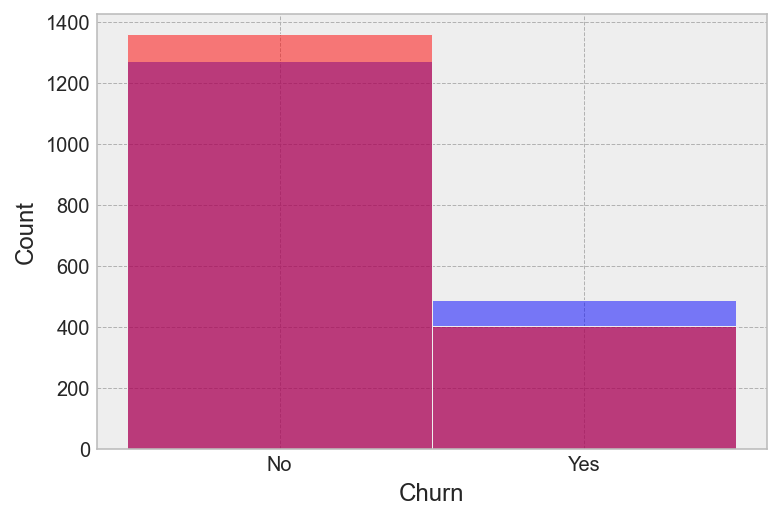

In [60]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

# Support Vector Classifier

In [61]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

In [62]:
y_pred=classifier.predict(X_test_transformed)

In [63]:
#from sklearn import metrics
b=metrics.accuracy_score(y_pred,y_test)

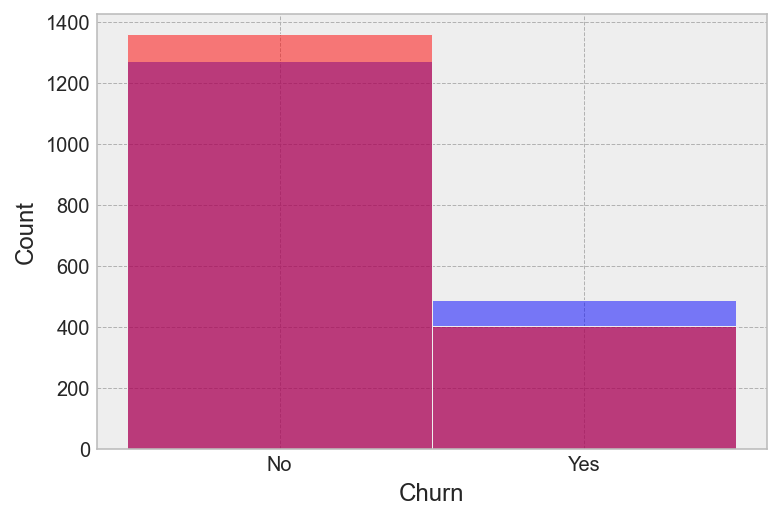

In [64]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

# KNeighborsClassifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [66]:
y_test_pred=classifier.predict(X_test_transformed)

In [67]:
c=metrics.accuracy_score(y_test_pred,y_test)

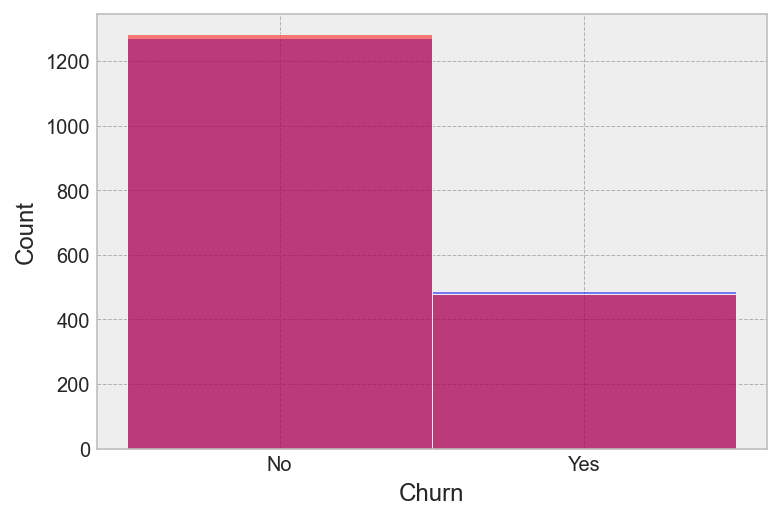

In [68]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

# DecisionTreeClassifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [70]:
y_test_pred=classifier.predict(X_test_transformed)

In [71]:
d=metrics.accuracy_score(y_test_pred,y_test)

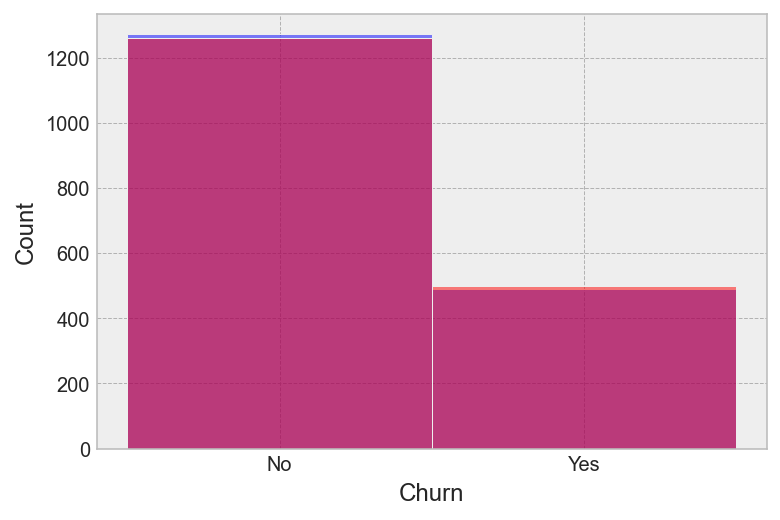

In [72]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

# RandomForestClassifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [74]:
y_test_pred=classifier.predict(X_test_transformed)

In [75]:
e=metrics.accuracy_score(y_test_pred,y_test)

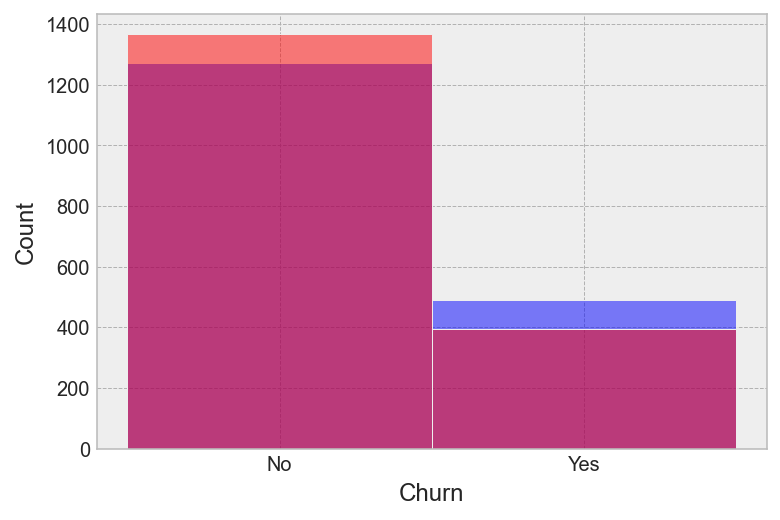

In [76]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [77]:
df_data = [['Logistic Classifier', a, str(round((a*100),2))+'%'],
                 ['Decision Tree Classifier',d,str(round((d*100),2))+'%'],
                 ['Support Vector Classifier',b,str(round((b*100),2))+'%'],
                 ['Random Forest Classifier ',e,str(round((e*100),2))+'%'],
            ['k-Nearest nebhiour',c,str(round((c*100),2))+'%']]

data = pd.DataFrame(df_data, columns = ['Algorithm','Accuracy','Accuracy %'])

In [78]:
data

Algorithm  Accuracy Accuracy %
0        Logistic Classifier  0.786485     78.65%
1   Decision Tree Classifier  0.710392     71.04%
2  Support Vector Classifier  0.776831     77.68%
3  Random Forest Classifier   0.783078     78.31%
4         k-Nearest nebhiour  0.750710     75.07%

 # conclusion
 
 * LogisticRegression---0.7864849517319704
 * Support Vector Classifier  ---0.7768313458262351
 * KNN Classifier  ---0.750709823963657
 * Decision Tree classifier --- 0.706984667802385
 * Random Forest Classifier ---0.7779670641680864
 
  * NOTE :- By observations of all above Machine learnig `LogisticRegressionr` is best predication 